# Temperature Exploration

Using Gollum to explore different stars and their temperatures.

In [6]:
from gollum.phoenix import PHOENIXGrid, PHOENIXSpectrum
from specutils import Spectrum1D
import pandas as pd
import astropy.units as u
import numpy as np

In [7]:
path='..\\..\\..\\data\\phoenix.astro.physik.uni-goettingen.de\\HiResFITS\\PHOENIX-ACES-AGSS-COND-2011\\'

In [8]:
grid = PHOENIXGrid(teff_range=(5000, 7000), logg_range=(2, 5), metallicity_range=(-0.5, 0), wl_lo= 4000, wl_hi= 12000,
                   path=path)

Processing Teff=6000K|log(g)=5.00|Z=+0.0: 100%|██████████████████████████████████████| 434/434 [00:21<00:00, 20.37it/s]


In [ ]:
grid.truncate

### Compute Starspot Contrast

Example from a sunspot

#### Kepler

In [55]:
spec1 = PHOENIXSpectrum(teff=7000, logg=4.5, metallicity=0, wl_lo=5000, wl_hi=7000, path=path).instrumental_broaden(resolving_power=1000)

In [60]:
spec2 = PHOENIXSpectrum(teff=5000, logg=4.5, metallicity=0, wl_lo=5000, wl_hi=7000, path=path).instrumental_broaden(resolving_power=1000)

<AxesSubplot:xlabel='$\\lambda \\;(\\AA)$', ylabel='Flux'>

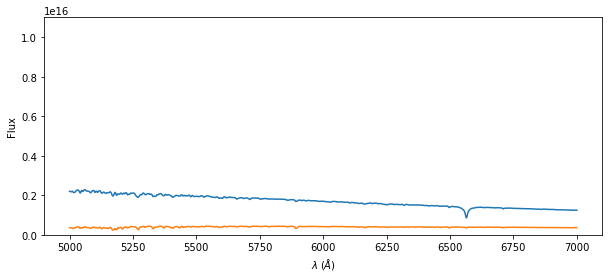

In [61]:
ax = spec1.plot()
ax.set_ylim(0, 1.1e16)
spec2.plot(ax=ax)

In [62]:
spec1.flux

<Quantity [2.20150448e+15, 2.20150415e+15, 2.20150350e+15, ...,
           1.24396470e+15, 1.24396475e+15, 1.24396478e+15] erg / (cm3 s)>

In [63]:
ratio = spec2/spec1

(0.0, 1.0)

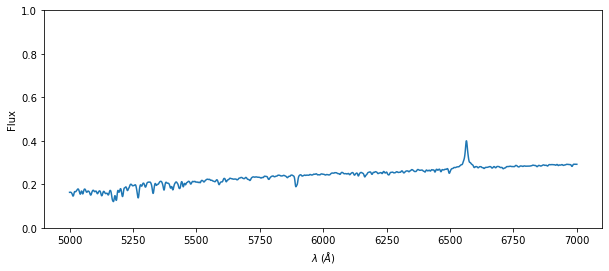

In [64]:
ax = ratio.plot()
ax.set_ylim(0, 1)

In [66]:
ratio.flux.mean()

<Quantity 0.23800731>

#### TESS

In [70]:
spec1 = PHOENIXSpectrum(teff=7000, logg=4.5, metallicity=0, wl_lo=8000, wl_hi=10000, path=path).instrumental_broaden(resolving_power=1000)

In [71]:
spec2 = PHOENIXSpectrum(teff=5000, logg=4.5, metallicity=0, wl_lo=8000, wl_hi=10000, path=path).instrumental_broaden(resolving_power=1000)

<AxesSubplot:xlabel='$\\lambda \\;(\\AA)$', ylabel='Flux'>

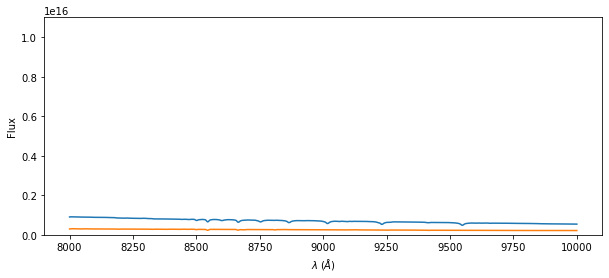

In [72]:
ax = spec1.plot()
ax.set_ylim(0, 1.1e16)
spec2.plot(ax=ax)

In [73]:
spec1.flux

<Quantity [9.02321358e+14, 9.02321443e+14, 9.02321615e+14, ...,
           5.39917168e+14, 5.39917161e+14, 5.39917157e+14] erg / (cm3 s)>

In [74]:
ratio = spec2/spec1

(0.0, 1.0)

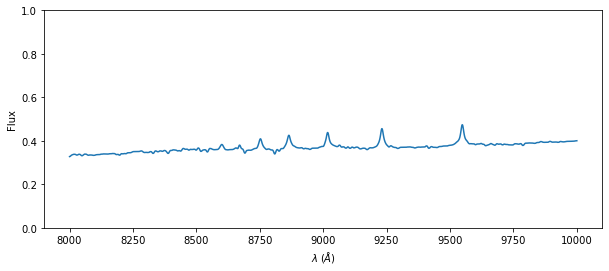

In [75]:
ax = ratio.plot()
ax.set_ylim(0, 1)

In [76]:
ratio.flux.mean()

<Quantity 0.37005779>

In [5]:
# grid.show_dashboard()

In [25]:
spec = grid[43]

<AxesSubplot:xlabel='$\\lambda \\;(\\AA)$', ylabel='Flux'>

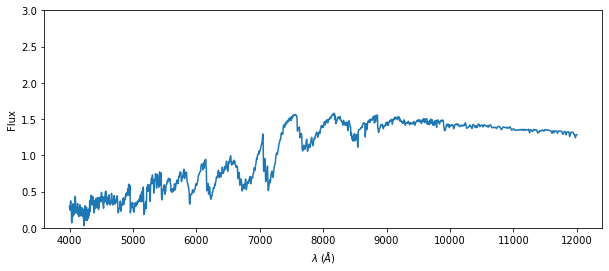

In [31]:
spec.instrumental_broaden(resolving_power=1000).normalize().plot(ylo=0, yhi=3)

In [35]:
spec.meta['grid_points'][43]

(3600, 2.5, 0.0)